In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import os

In [9]:
# Change this path based on run directory
# Or read in the million formattd files to have reads per million on the table
path = "/Volumes/GoogleDrive/My Drive/Lemay_lab/analysis_outputs"

df = pd.read_csv(os.path.join(path, "NovaSeq122/NovaSeq122_libsize.tsv"), sep='\t', header=0)
dfm = pd.melt(df, col_level=0, 
              id_vars=['sampleID'], 
              value_vars=['unzip','flash'], 
              var_name='Process', 
             value_name='Read count')
dfm

,sampleID,Process,Read count
0,5042,unzip,28930341
1,5046,unzip,33036206
2,5048,unzip,33110507
3,5042,flash,26098261
4,5046,flash,30031196
5,5048,flash,30039682


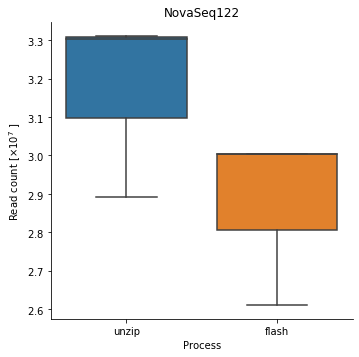

In [11]:
# based on: http://greg-ashton.physics.monash.edu/setting-nice-axes-labels-in-matplotlib.html
def update_label(old_label, exponent_text):
    if exponent_text == "":
        return old_label
    
    try:
        units = old_label[old_label.index("[") + 1:old_label.rindex("]")]
    except ValueError:
        units = ""
    label = old_label.replace("[{}]".format(units), "")
    
    exponent_text = exponent_text.replace("\\Read count", "") # !!CHANGE ME FOR YOUR USE
    
    return "{} [{} {}]".format(label, exponent_text, units)
    
def format_label_string_with_exponent(ax, axis='both'):  
    """ Format the label string with the exponent from the ScalarFormatter """
    plt.ticklabel_format(axis=axis, style='sci')

    axes_instances = []
    if axis in ['x', 'both']:
        axes_instances.append(ax.xaxis)
    if axis in ['y', 'both']:
        axes_instances.append(ax.yaxis)
    
    for ax in axes_instances:
        ax.major.formatter._useMathText = True
        plt.draw() # Update the text
        exponent_text = ax.get_offset_text().get_text()
        label = ax.get_label().get_text()
        ax.offsetText.set_visible(False)
        ax.set_label_text(update_label(label, exponent_text))
        
# Make the figure and change the axis labels to scienctific notations
fig = sns.catplot(x="Process", y="Read count", kind="box", data=dfm).set_titles("dd")
format_label_string_with_exponent(fig.ax, axis='y')
fig.ax.set_title("NovaSeq122")
fig.savefig(os.path.join(path, "NovaSeq122/NovaSeq122_libsize_3samples.pdf"),
            format='pdf')

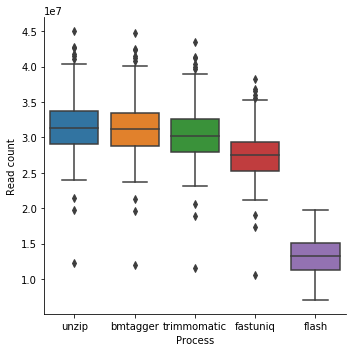

In [9]:
fig = sns.catplot(x="Process", y="Read count (million)", kind="box", data=dfm).set_titles("dd")




#make the y axis label to show in plain numbers
#plt.ticklabel_format(style='plain', axis='y')

# save the fig  
#fig.savefig(os.path.join(path, "043_pipeline_libsize.pdf"),
  #          format='pdf') 

In [192]:
fig.ax.yaxis


In [6]:
# histogram
import glob
path = "/Volumes/GoogleDrive/My Drive/Lemay_lab/analysis/NovaSeq072_rerun"

tabm = pd.DataFrame()

for file in glob.glob(os.path.join(path, "hist/*.hist")):
    tab = pd.read_csv(file, sep='\t', names=['Merged read length','Read count'], header=None, engine='python')
    tab['sampleID'] = file[-9:-5] 
    try:
        tabm = pd.concat([tab, tabm],sort=False)
    except KeyError:
        tabm = tab.copy()
    tabm.to_csv(os.path.join(path,"hist/merged.hist"), sep='\t')
    


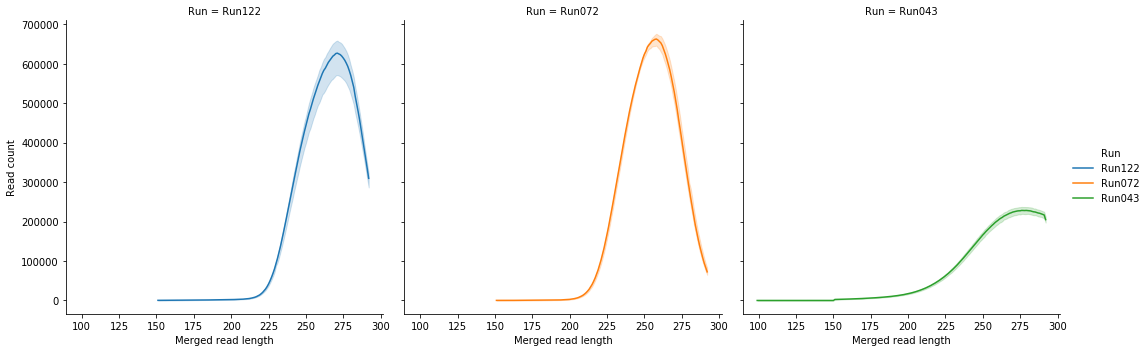

In [10]:
tabm043 = pd.read_csv(os.path.join("/Volumes/GoogleDrive/My Drive/Lemay_lab/analysis/NovaSeq043", "flash_hist/merged.hist"), sep='\t', header=0, index_col=0)
tabm072 = pd.read_csv(os.path.join("/Volumes/GoogleDrive/My Drive/Lemay_lab/analysis/NovaSeq072_rerun", "hist/merged.hist"), sep='\t', header=0, index_col=0)
tabm122 = pd.read_csv(os.path.join("/Volumes/GoogleDrive/My Drive/Lemay_lab/analysis/NovaSeq122", "hist/merged.hist"), sep='\t', header=0, index_col=0)

tabm043['Run'] = 'Run043'
tabm072['Run'] = 'Run072'
tabm122['Run'] = 'Run122'


tabm2 = pd.concat([tabm122,tabm072,tabm043],sort=False)
tabm2

sns.relplot(x="Merged read length", y="Read count", hue="Run", kind="line", col="Run", data=tabm2).savefig(os.path.join("/Volumes/GoogleDrive/My Drive/Lemay_lab/analysis/QC", "Novaseq_len_dist.pdf"),
            format='pdf') 



AttributeError: 'Line2D' object has no property 'title'

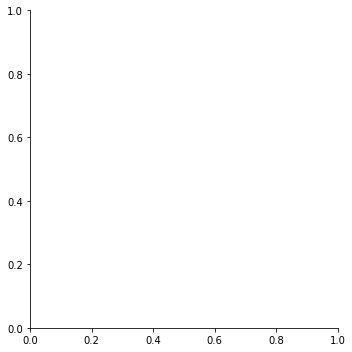

In [11]:
tabm = pd.read_csv(os.path.join("/Volumes/GoogleDrive/My Drive/Lemay_lab/analysis/NovaSeq043", "flash_hist/merged.hist"), sep='\t', header=0, index_col=0)

#tabm['Run'] = 'Hiseq_qc'

plt = sns.relplot(x="Merged read length", y="Read count", kind="line", title="Run043", data=tabm)
plt.title('Run043')
plt.savefig(os.path.join("/Volumes/GoogleDrive/My Drive/Lemay_lab/analysis/QC/", "Run043_len_dist.pdf"),format='pdf') 

In [12]:
path = "/Volumes/GoogleDrive/My Drive/Lemay_lab/analysis_outputs/"

df = pd.read_csv(os.path.join(path, "R043_pipeline_libsize.csv"), sep=',', header=0)
df

,sampleID,unzip,bmtagger,trimmomatic,fastuniq,flash,dup_reads
0,5002,27517378,27371851,26681150,24268365,13374731,2412785
1,5005,32020513,31753397,30859233,27855636,18327443,3003597
2,5006,29226983,29054464,28266052,25643969,17343154,2622083
3,5007,31391864,31196726,30305965,27488397,15164114,2817568
4,5011,29150206,28979861,28135817,25405830,15363707,2729987
...,...,...,...,...,...,...,...
91,8040,26648813,26427125,25646620,23537236,7203646,2109384
92,8041,21470673,21242539,20587789,18992587,6979801,1595202
93,8042,37828491,37395024,36366986,32616747,15226146,3750239
94,8048,32917343,32626903,31643926,28582029,10810835,3061897


In [15]:
# Add a column with dup_reads
df['dup_percent']=df['dup_reads']/df['trimmomatic']
df

,sampleID,unzip,bmtagger,trimmomatic,fastuniq,flash,dup_reads,dup_percent
0,5002,27517378,27371851,26681150,24268365,13374731,2412785,0.090430
1,5005,32020513,31753397,30859233,27855636,18327443,3003597,0.097332
2,5006,29226983,29054464,28266052,25643969,17343154,2622083,0.092764
3,5007,31391864,31196726,30305965,27488397,15164114,2817568,0.092971
4,5011,29150206,28979861,28135817,25405830,15363707,2729987,0.097029
...,...,...,...,...,...,...,...,...
91,8040,26648813,26427125,25646620,23537236,7203646,2109384,0.082248
92,8041,21470673,21242539,20587789,18992587,6979801,1595202,0.077483
93,8042,37828491,37395024,36366986,32616747,15226146,3750239,0.103122
94,8048,32917343,32626903,31643926,28582029,10810835,3061897,0.096761


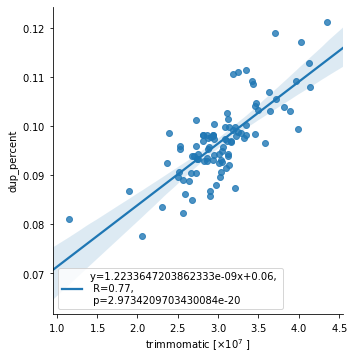

In [24]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df['unzip'],df['dup_percent'])


# use line_kws to set line label for legend
fig = sns.lmplot(x="trimmomatic", y="dup_percent", data=df, 
                 line_kws={'label':"y={0}x+{1:.2f}, \n R={2:.2f}, \n p={3}".format(slope,intercept,r_value,p_value)})

# plot legend to add the annotation
fig.ax.legend()

format_label_string_with_exponent(fig.ax, axis='both')

4.4341220012280825e-57